In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
from matplotlib import rc
import astropy.constants as const
rc('figure', figsize=(12.0, 7.0))

In [3]:
#path to galaxy data
path_gal = '/Users/jeremyc/Desktop/Astro361/Lab8/galaxy-rotation-curve/galaxyData/'

#reads all files with name 'gal' and sorts them
galaxy_files = glob.glob(path_gal + "gal*")
galaxy_files.sort()

In [4]:
#reading flux into galaxy_spectra array
galaxy_spectra = []

for galaxy_file in galaxy_files:
    
    with open(galaxy_file) as galaxy_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(galaxy_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            tot_spectrum = tot_spectrum/len(spectrum_rows)
        galaxy_spectra.append(tot_spectrum) 
        
#reading bg flux into bg_spectra array
bg_spectra = []

with open('/Users/jeremyc/Desktop/Astro361/Lab8/galaxy-rotation-curve/galaxyData/calib_pole.dat') as bg_data:
        
    spectrum_rows = []
        
    for j, row in enumerate(bg_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
        if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
            spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
    tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
    for row in spectrum_rows: 
        temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
        spec = [] # Create an empty list to hold the spectral data
        for val in temp_spec: # Iterate over the elements of your split list.
            if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
        bg_spectra = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
        bg_spectra = bg_spectra/len(spectrum_rows)
        
#subtract spectra from background
corrected_galaxy = [galaxy - bg_spectra for galaxy in galaxy_spectra]

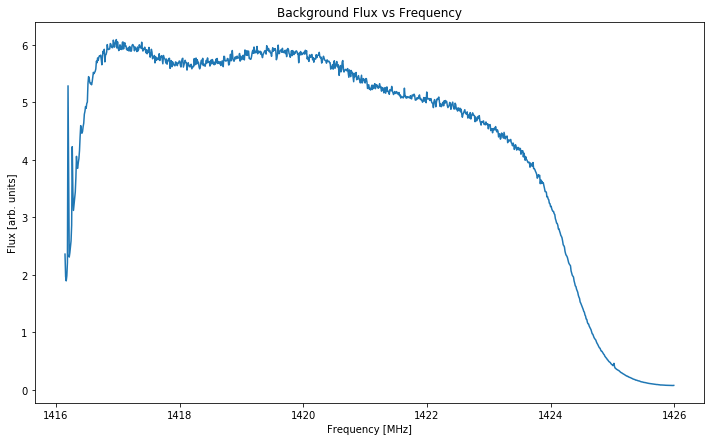

In [6]:
frequency = np.arange(1416,1426,0.009766)
plt.plot(frequency[15:],bg_spectra[15:])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')
plt.title('Background Flux vs Frequency')
plt.savefig('Background')
plt.show()

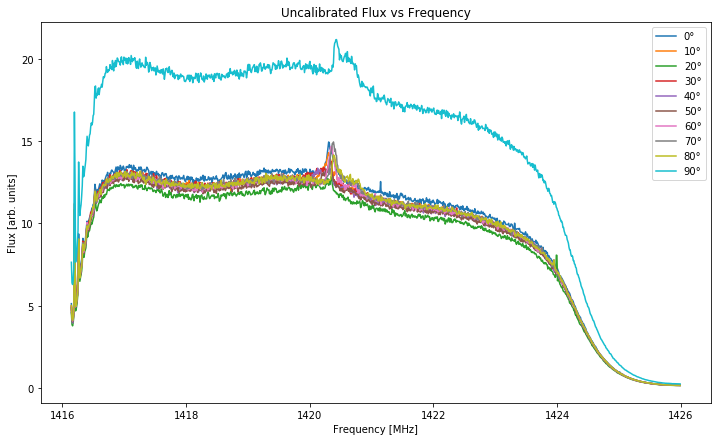

In [7]:
#plotting uncorrected spectra
for i in range(0,10):
    if i == 0:
        plt.plot(frequency[15:],galaxy_spectra[i][15:],label = (str(10*i) + '°'))
        plt.xlabel('Frequency [MHz]')
        plt.ylabel('Flux [arb. units]')
        plt.title('Uncalibrated Flux vs Frequency')
        plt.savefig('Uncalibrated')
    else:
        plt.plot(frequency[15:],galaxy_spectra[i][15:],label = (str(10*i) + '°'))
        plt.xlabel('Frequency [MHz]')
        plt.ylabel('Flux [arb. units]')
        plt.title('Uncalibrated Flux vs Frequency')
            
plt.legend()
plt.show()

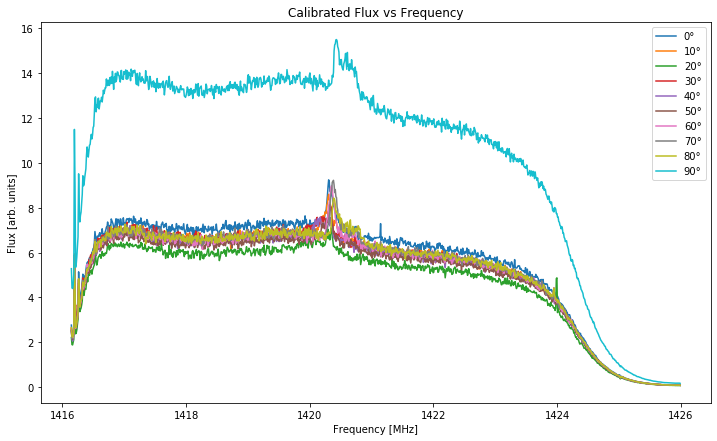

In [8]:
#plotting corrected spectra
for i in range(0,10):
    if i == 0:
        plt.plot(frequency[15:],corrected_galaxy[i][15:],label = (str(10*i) + '°'))
        plt.xlabel('Frequency [MHz]')
        plt.ylabel('Flux [arb. units]')
        plt.title('Calibrated Flux vs Frequency')
        plt.savefig('Calibrated')
    else:
        plt.plot(frequency[15:],corrected_galaxy[i][15:],label = (str(10*i) + '°'))
        plt.xlabel('Frequency [MHz]')
        plt.ylabel('Flux [arb. units]')
        plt.title('Calibrated Flux vs Frequency')
        
plt.legend()
plt.show()

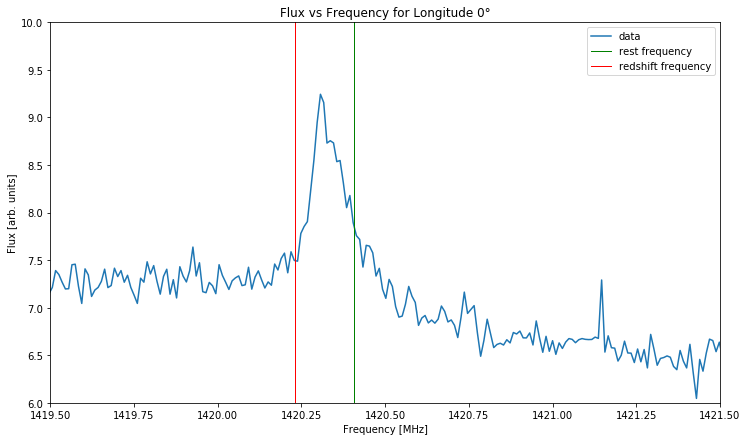

In [9]:
#calculating frequency in MHz of 21cm transition
wavelength = 21.10611405413 #in cm
c = (const.c.cgs).value
rest_frequency = (c/wavelength/10**6) #in MHz

#plotting all 10 corrected spectra and plotting the rest frequency plus the redshifted frequency
plt.plot(frequency[15:],corrected_galaxy[0][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_0 = 1420.23
err_0 = 0.02
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_0,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 0°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.ylim(6,10)
plt.xlim(1419.5,1421.5)
plt.savefig('0')
plt.show()

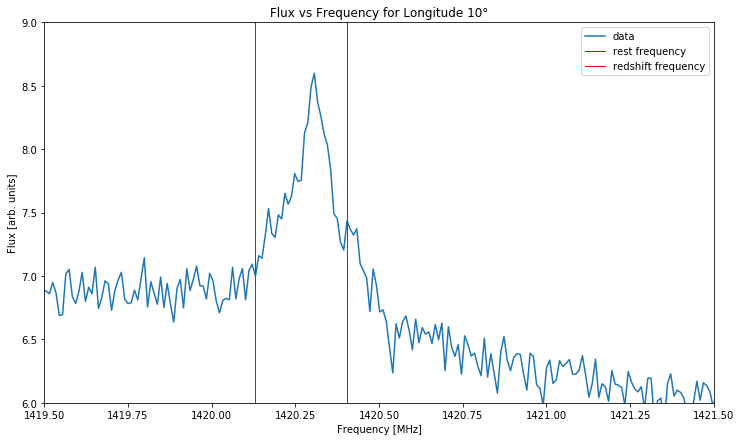

In [10]:
plt.plot(frequency[15:],corrected_galaxy[1][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_10 = 1420.13
err_10 = 0.02
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_10,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 10°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421.5)
plt.ylim(6,9)
plt.savefig('10')
plt.show()

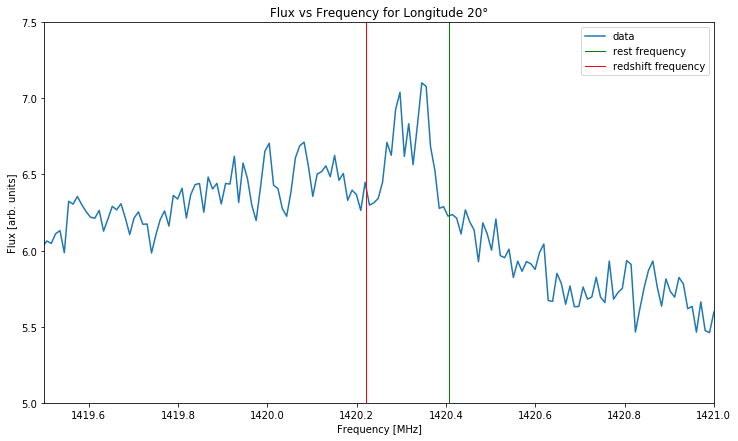

In [11]:
plt.plot(frequency[15:],corrected_galaxy[2][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_20 = 1420.22
err_20 = 0.03
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_20,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 20°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421)
plt.ylim(5,7.5)
plt.savefig('20')
plt.show()

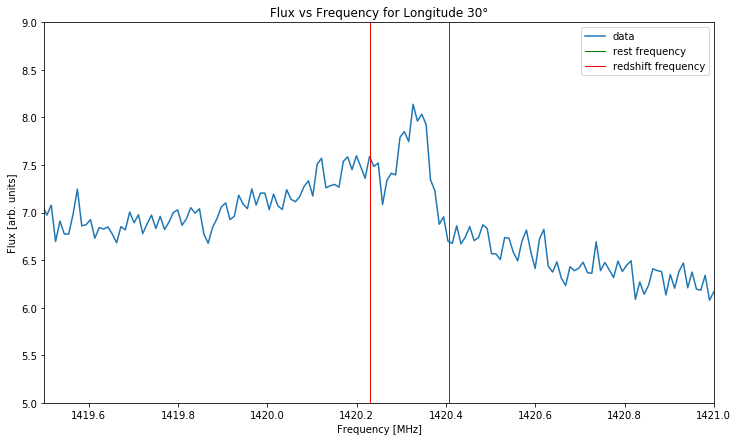

In [12]:
plt.plot(frequency[15:],corrected_galaxy[3][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_30 = 1420.23
err_30 = 0.03
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_30,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 30°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421)
plt.ylim(5,9)
plt.savefig('30')
plt.show()

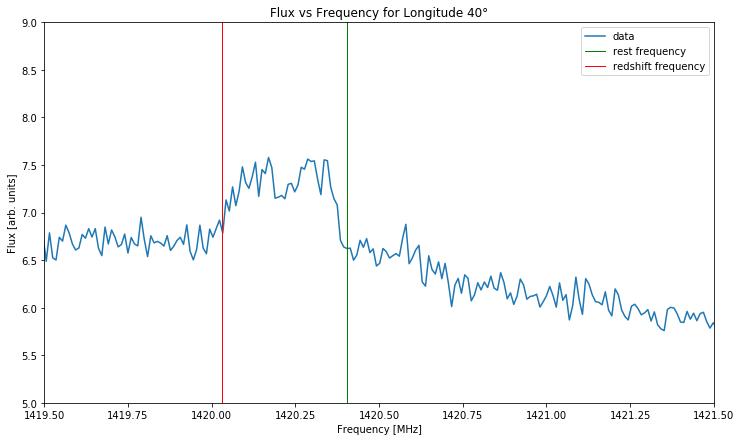

In [13]:
plt.plot(frequency[15:],corrected_galaxy[4][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_40 = 1420.03
err_40 = 0.02
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_40,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 40°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421.5)
plt.ylim(5,9)
plt.savefig('40')
plt.show()

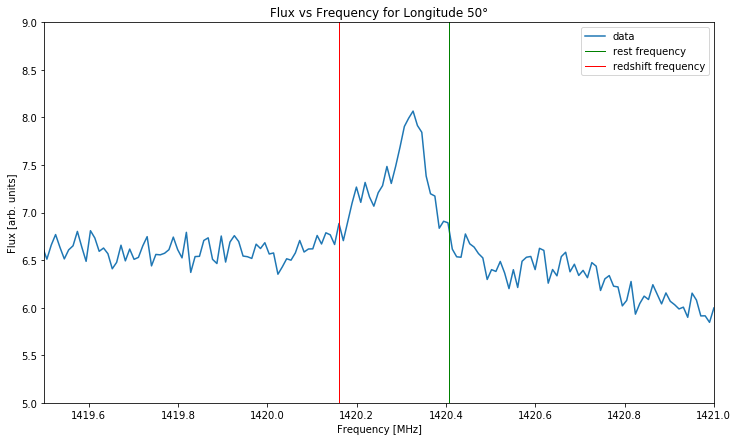

In [14]:
plt.plot(frequency[15:],corrected_galaxy[5][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_50 = 1420.16
err_50 = 0.02
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_50,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 50°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421)
plt.ylim(5,9)
plt.savefig('50')
plt.show()

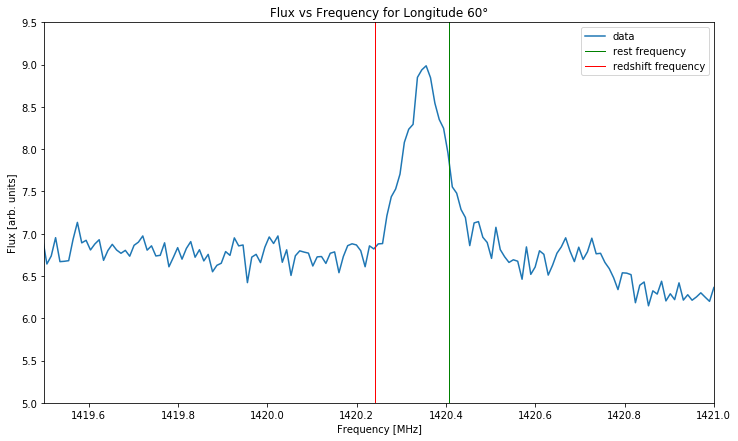

In [15]:
plt.plot(frequency[15:],corrected_galaxy[6][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_60 = 1420.24
err_60 = 0.02
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_60,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 60°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421)
plt.ylim(5,9.5)
plt.savefig('60')
plt.show()

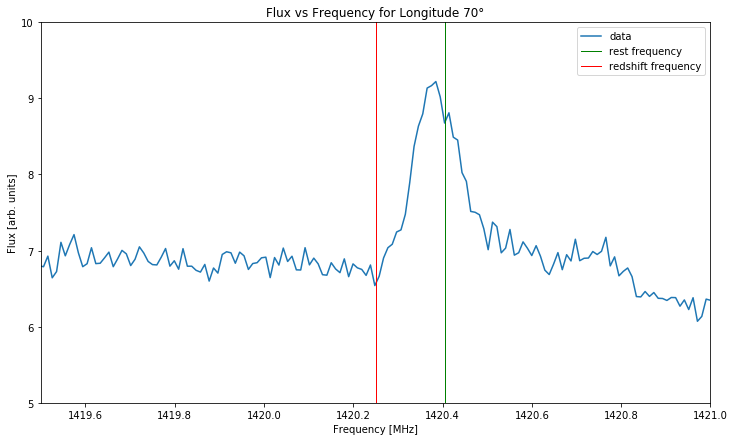

In [16]:
plt.plot(frequency[15:],corrected_galaxy[7][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_70 = 1420.25
err_70 = 0.03
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_70,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 70°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1419.5,1421)
plt.ylim(5,10)
plt.savefig('70')
plt.show()

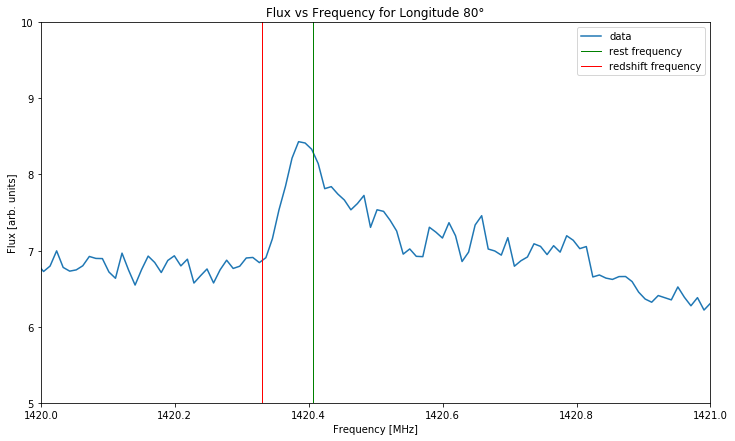

In [17]:
plt.plot(frequency[15:],corrected_galaxy[8][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_80 = 1420.33
err_80 = 0.01
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_80,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 80°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1420,1421)
plt.ylim(5,10)
plt.savefig('80')
plt.show()

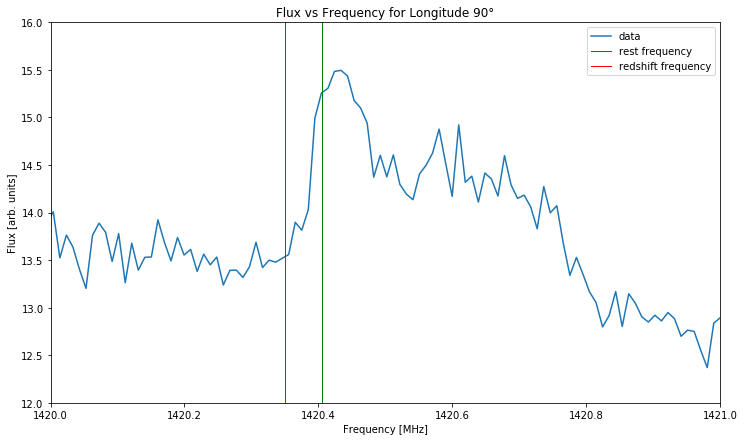

In [18]:
plt.plot(frequency[15:],corrected_galaxy[9][15:])       
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux [arb. units]')

freq_90 = 1420.35
err_90 = 0.02
plt.axvline(rest_frequency,color='g',linewidth = 1)
plt.axvline(freq_90,color='r',linewidth = 1)
plt.title('Flux vs Frequency for Longitude 90°')
plt.gca().legend(('data','rest frequency','redshift frequency'))
plt.xlim(1420,1421)
plt.ylim(12,16)
plt.savefig('90')
plt.show()

In [19]:
#these are the redshfited frequencies and uncertainty
observed_freq = np.asarray([freq_0,freq_10,freq_20,freq_30,freq_40,freq_50,freq_60,freq_70,freq_80,freq_90])
err_freq = np.asarray([err_0,err_10,err_20,err_30,err_40,err_50,err_60,err_70,err_80,err_90])
print ('Observed frequencies:\n', observed_freq)

#reading vlsr values from data
vlsr = np.zeros(10)
for i in range(0,10):
    path = '/Users/jeremyc/Desktop/Astro361/Lab8/galaxy-rotation-curve/galaxyData/galpos' + str(i) +"0"+'.dat'
    with open(path, 'r') as f:
        lines = f.readlines()
        x = np.float(str(lines[0].split('vlsr')[1][:9]))
        vlsr[i] = x #vlsr is in km/s

#orbital velocity of sun dependent on galactic latitude
velocity_l = np.zeros(10)

for i in range(0,10):   
    v0 = 254 #velocity of sun around galactic center in km/s
    velocity_l[i] = v0*np.sin(i*10*np.pi/180)

#distance from galactic center dependent on galactic latitude    
radius = np.zeros(10)

for i in range(0,10):
    r0 = 8.4 #distance between sun and galactic center in kpc
    radius[i] = r0*np.sin(i*10*np.pi/180)
    
print ('Galactic Distance:\n', radius)

Observed frequencies:
 [1420.23 1420.13 1420.22 1420.23 1420.03 1420.16 1420.24 1420.25 1420.33
 1420.35]
Galactic Distance:
 [0.         1.45864469 2.8729692  4.2        5.39941592 6.43477332
 7.27461339 7.89341801 8.27238513 8.4       ]


Maximum velocity:
 [37.09436903 58.20048308 39.20498043 37.09436903 79.30659714 51.86864887
 34.98375762 32.87314622 15.98825498 11.76703216]
Velocity errors:
 [32.87314622 53.97926027 32.87314622 30.76253481 75.08537433 47.64742606
 30.76253481 26.541312   13.87764357  7.54580935]
Orbital velocity:
 [ 26.61436903  92.44712021 117.11809684 156.32436903 236.24465
 241.74393742 252.02421019 270.4850719  266.94942424 268.44703216]


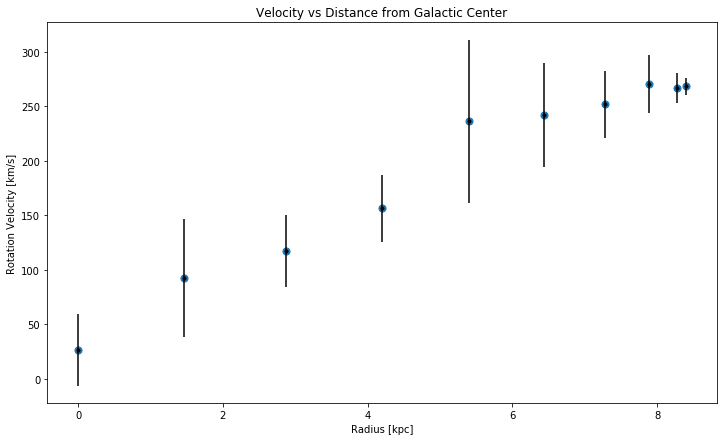

In [20]:
#from observed frequency, we calculate relative velocity from doppler shift
def doppler(f):
    v = (1-(f/rest_frequency))*c/(10**5)
    return abs(v)

rel_velocity = doppler(observed_freq)
print ('Maximum velocity:\n', rel_velocity)

#uncertainty in velocity
err_velocity = doppler(err_freq+observed_freq)
print ('Velocity errors:\n', err_velocity)

#this accounts for relative velocity, solar orbital velocity and peculiar motion
true_velocity = rel_velocity + velocity_l - vlsr
print ('Orbital velocity:\n', true_velocity)

plt.scatter(radius,true_velocity,s=50)
plt.errorbar(radius,true_velocity,yerr=err_velocity,fmt= '.k')
plt.title('Velocity vs Distance from Galactic Center')
plt.xlabel('Radius [kpc]')
plt.ylabel('Rotation Velocity [km/s]')
plt.savefig('Rotation Curve')
plt.show()